# Maximum-likelihood estimate for mean lifetime in radiactive decay

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi, sin

In [2]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

In [3]:
# Default plot style
rcParams['axes.linewidth'] = 2
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.grid'] = True
rcParams['grid.linestyle'] = (5,10)

rcParams['figure.figsize'] = (12, 7)
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 14
rcParams['legend.fontsize'] = 14

### Solution

The maximum likelihood function for a set of measured values $\{x_i\}$ is given by the product of the probability densities

$$ L(x, \vec{\lambda}) = \prod_{i = 1}^n f(x_i, \vec{\lambda}). $$

We can find the best estimator $\vec{\hat{\lambda}}$ by maximizing $L$ with respect to $\lambda$. In the case of radioactive decay, for our parameter $\lambda = \tau$, the best estimate is given by

$$ \hat{\tau} = \dfrac{1}{n} \sum_{i = 1}^n t_i $$ 

and the standard deviation by

$$ \sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}. $$

We use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$. This requires us to perform some basic algebra.

First, the logarithm of the maximum likelihood function is

$$ \ln{L(\tau)} = \sum_{i = 1}^n \ln{f(\tau)} = \sum_{i = 1}^n - \ln{\tau} - \dfrac{t_i}{\tau}.  $$

$$ \ \ \ \ = - n \ln{\tau} - \sum_{i = 1}^n \dfrac{t_i}{\tau}$$

$$ \ \ \ \ \ \ = - n \ln{\tau} - \dfrac{\ln}{\tau} \dfrac{1}{n} \sum t_i$$

$$ \ \ \ \ \ \ \ \ \ \ \ = -n \ln{\tau} - n \dfrac{\hat{\tau}}{\tau} $$

And its second derivative wrt $\tau$

$$ \dfrac{\partial^2 \ln{L}}{\partial^2 \tau} \bigg|_{\tau = \hat{\tau}} = \dfrac{n}{\hat{\tau}^2} - \dfrac{2 n \hat{\tau}}{\hat{\tau}^3} = - \dfrac{n}{\hat{\tau}}, $$

which means that the deviation according to the formula above is

$$ \sigma_\tau = \dfrac{\hat{\tau}}{\sqrt{n}}. $$

b) We'll now generate some data and plot the log likelihood function and the parabolic approximation, for that we use

$$ \ln{L(\tau)} \approx \ln{L_\mathrm{max}} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}, $$

where we'll assume $\ln{L_\mathrm{max}}$ to mean the log likelihood function reaches a maximum. We find by differentiating, that this happens at $\tau = \hat{\tau}$.

In [4]:
# Generate data
data_3 = generate_data(2, 3)
data_30 = generate_data(2, 30)
data_300 = generate_data(2, 300)
data_3000 = generate_data(2, 3000)

# Define log L
def log_L(ts, tau):
    log_Ls = np.array([])
    
    for i in tau:
        log_Ls = np.append(log_Ls, np.sum(- log(i) - ts / i))
        
    return log_Ls


# Define parabolic approximation
def log_L_par(ts, tau):
    log_L_pars = np.array([])
    n = len(ts)
    tau_hat = 1 / n * np.sum(ts)
    sigma = tau_hat / sqrt(n)
    log_L_max = log_L(ts, [tau_hat])
    
    for i in tau:
        log_L_pars = np.append(log_L_pars, log_L_max 
                               - (i - tau_hat) ** 2 / (2 * sigma ** 2))
    
    return log_L_pars
    


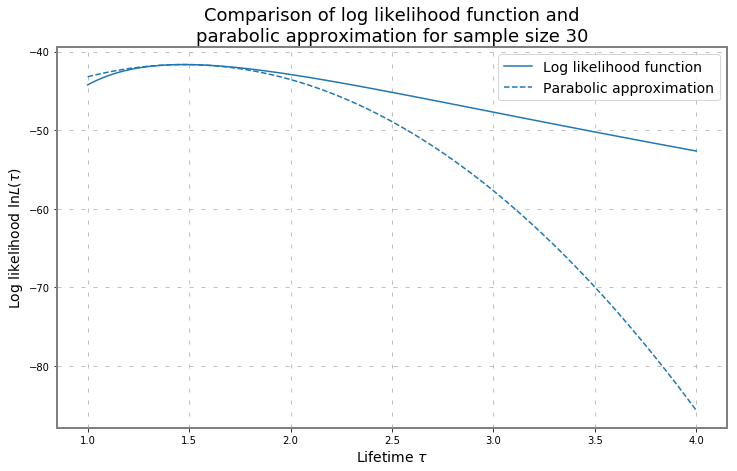

In [5]:
# Plot
taus = np.linspace(1, 4, 100)

plt.figure(figsize = (12, 7))
plt.title('''Comparison of log likelihood function and
parabolic approximation for sample size 30''')
plt.xlabel('Lifetime $\\tau$')
plt.ylabel('Log likelihood ln$L(\\tau)$')
plt.plot(taus, log_L(data_30, taus), label = 'Log likelihood function', color = 'C0')
plt.plot(taus, log_L_par(data_30, taus), label = 'Parabolic approximation', 
         ls = 'dashed', color = 'C0')

plt.legend(loc = 'best')
plt.show()

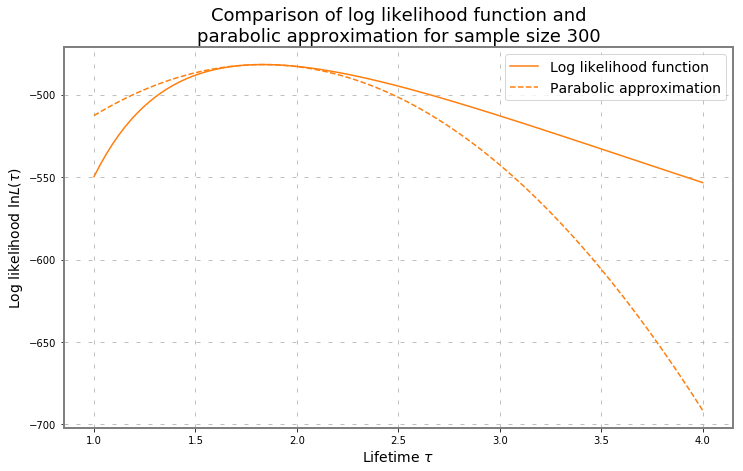

In [6]:
plt.figure(figsize = (12, 7))
plt.title('''Comparison of log likelihood function and
parabolic approximation for sample size 300''')
plt.xlabel('Lifetime $\\tau$')
plt.ylabel('Log likelihood ln$L(\\tau)$')
plt.plot(taus, log_L(data_300, taus), label = 'Log likelihood function', 
         color = 'C1')
plt.plot(taus, log_L_par(data_300, taus), label = 'Parabolic approximation',
        color = 'C1', ls = 'dashed')

plt.legend(loc = 'best')
plt.show()

With the naked eye it's difficult to perceive a difference in accuracy of the parabolic approximation for larger data samples. For that purpose we will superimpose them in the next graph

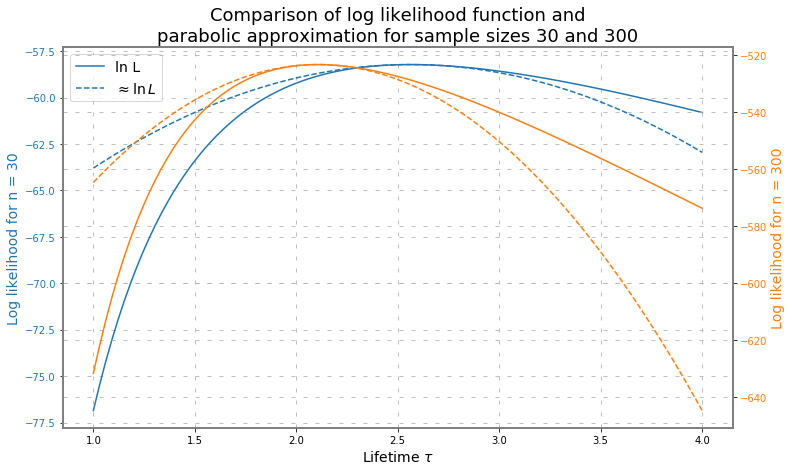

In [7]:
# Generate data again
data_3 = generate_data(2, 3)
data_30 = generate_data(2, 30)
data_300 = generate_data(2, 300)
data_3000 = generate_data(2, 3000)


# Plot
taus = np.linspace(1, 4, 100)


fig, ax1 = plt.subplots()

color_1 = 'C0'
title = '''Comparison of log likelihood function and
parabolic approximation for sample sizes 30 and 300'''
ax1.set_title(title)

ax1.set_xlabel('Lifetime $\\tau$')
ax1.set_ylabel('Log likelihood for n = 30', color = color_1)
ax1.plot(taus, log_L(data_30, taus), label = 'ln L', color = color_1)
ax1.plot(taus, log_L_par(data_30, taus), label = '$\\approx \mathrm{ln}\, L$', 
         color = color_1, ls = 'dashed')
ax1.tick_params(axis='y', labelcolor = color_1)

ax2 = ax1.twinx() # Second y-axis

color_2 = 'C1'
ax2.set_ylabel('Log likelihood for n = 300', color = color_2) 
ax2.plot(taus, log_L(data_300, taus), label = 'ln $L$', color = color_2)
ax2.plot(taus, log_L_par(data_300, taus), label = '$\approx \mathrm{ln}\, L$', 
         color = color_2, ls = 'dashed')
ax2.tick_params(axis='y', labelcolor = color_2)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'best')
plt.show()

We can see clearly see that the parabolic approximation works great around the expected lifetime with noticeable decrease in accuracy for larger lifetimes. However, the first thing to note here, is that the generate_data function generates at random a new set of data every time it is evaluated. So in this case we've picked one that is deceptive and almost perfectly superimposes the two sets. For fun we'll run it again with new data. We'll see that even though the curves are now distinct, they still show a similar level of accuracy for the parabolic approximation, even though the two sets are shifted a bit.

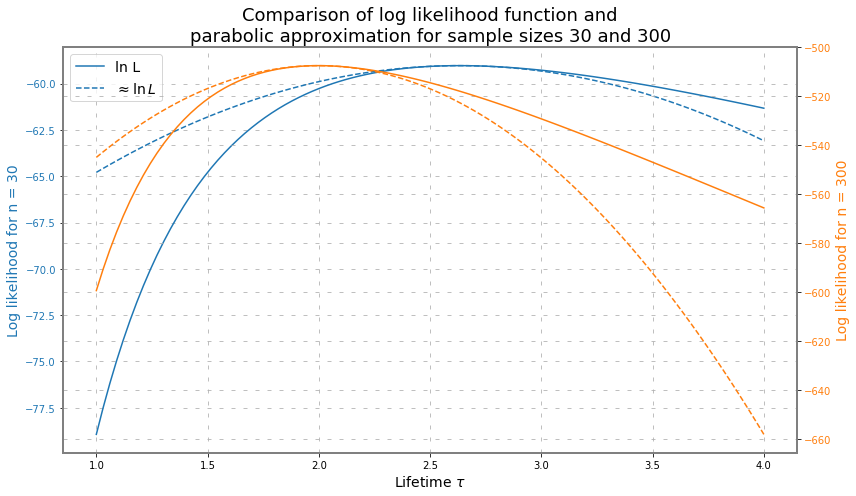

In [31]:
# Generate data again again
data_30 = generate_data(2, 30)
data_300 = generate_data(2, 300)


# Plot
taus = np.linspace(1, 4, 100)


fig, ax1 = plt.subplots()

color_1 = 'C0'
title = '''Comparison of log likelihood function and
parabolic approximation for sample sizes 30 and 300'''
ax1.set_title(title)

ax1.set_xlabel('Lifetime $\\tau$')
ax1.set_ylabel('Log likelihood for n = 30', color = color_1)
ax1.plot(taus, log_L(data_30, taus), label = 'ln L', color = color_1)
ax1.plot(taus, log_L_par(data_30, taus), label = '$\\approx \mathrm{ln}\, L$', 
         color = color_1, ls = 'dashed')
ax1.tick_params(axis='y', labelcolor = color_1)

ax2 = ax1.twinx() # Second y-axis

color_2 = 'C1'
ax2.set_ylabel('Log likelihood for n = 300', color = color_2) 
ax2.plot(taus, log_L(data_300, taus), label = 'ln $L$', color = color_2)
ax2.plot(taus, log_L_par(data_300, taus), label = '$\approx \mathrm{ln}\, L$', 
         color = color_2, ls = 'dashed')
ax2.tick_params(axis='y', labelcolor = color_2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'best')
plt.show()

c) We now generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. Since we're counting whether $\tau$ lies within the 1 sigma interval of the expectation value, we expect an accuracy of around 68.3%. We get this result by integrating a gaussian distribution from $-\sigma$ to $\sigma$. Due to the randomness of the data, our result will vary between different values around this number.

In [25]:
counter = 0

for i in range (0, 1000):
    # Generate data with 500 samples around an expected value of 2
    ts = generate_data(2, 500)
    tau_hat = 1 / 500 * np.sum(ts)
    sigma_tau_hat = tau_hat / sqrt(500)
    
    # Count if tau = 2 lies within the error margin of tau_hat
    if 2 >= tau_hat - sigma_tau_hat and 2 <= tau_hat + sigma_tau_hat:
        counter = counter + 1

print('The portion of values that fall within the 1 sigma range is', counter / 10, '%')

The portion of values that fall within the 1 sigma range is 71.5 %
